![image](https://user-images.githubusercontent.com/57321948/196933065-4b16c235-f3b9-4391-9cfe-4affcec87c35.png)

# Submitted by: Mohammad Wasiq

## Email: `gl0427@myamu.ac.in`

# DSA (Data Structures and Algorithms) `Tree`

## Day - 21

**Q1. Given an array arr[] of N nodes representing preorder traversal of some BST. You have to build the exact postorder from it's given preorder traversal.**

In Preorder traversal, the root node is visited before the left child and right child nodes.

**Example 1:**
```
Input:
N = 5
arr[]  = {40,30,35,80,100}
Output:

35 30 100 80 40
Explanation:

PreOrder: 40 30 35 80 100
Therefore, the BST will be:
              40
           /      \
         30       80
           \         \
           35        100
```
Hence, the postorder traversal will be: 35 30 100 80 40

**Example 2:**
```
Input:
N = 8
arr[]  = {40,30,32,35,80,90,100,120}
Output:

35 32 30 120 100 90 80 40
```
**Code :**

In [ ]:
def post_order(pre, size):
    if size == 0:
        return None

    return construct(pre,[0],float('-inf'),float('inf'),size)

def construct(preorder,pointer,lower,upper,size):
    if pointer[0] == size or lower > preorder[pointer[0]] or upper < preorder[pointer[0]]:
        return None

    root = Node(preorder[pointer[0]])
    pointer[0] += 1

    root.left = construct(preorder,pointer,lower,root.data,size)
    root.right = construct(preorder,pointer,root.data,upper,size)

    return root

**Q2.** Given the root of a binary search tree, and an integer k, return *the kth smallest value (1-indexed) of all the values of the nodes in the tree.*

Input1:
```
root = [3,1,4,null,2], k = 1
```

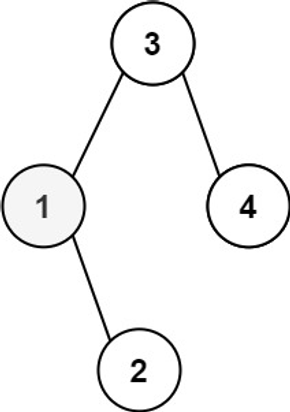

Output1: 1


Input2:
```
root = [5,3,6,2,4,null,null,1], k = 3
```

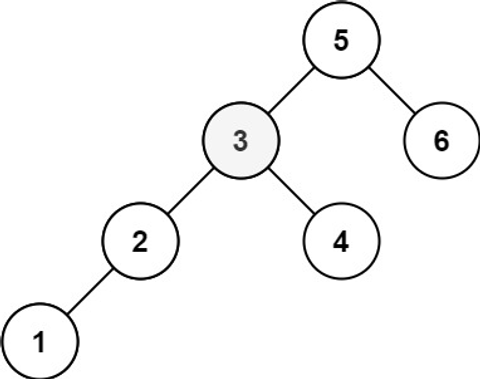

Output2: 3

**Code :**

In [ ]:
class Solution:
    def kthSmallest(self, root: TreeNode, k: int) -> int:
        pq = []
        self.fill(root, pq)
        for i in range(k - 1):
            heapq.heappop(pq)
        return heapq.heappop(pq)

    def fill(self, root, pq):
        if root is None:
            return
        heapq.heappush(pq, root.val)
        self.fill(root.left, pq)
        self.fill(root.right, pq)

**Q2.** Given a root node reference of a BST and a key, delete the node with the given key in the BST. Return *the **root node reference** (possibly updated) of the BST*.

Basically, the deletion can be divided into two stages:

1. Search for a node to remove.
2. If the node is found, delete the node.

**Example 1:**

Input:
```
root = [5,3,6,2,4,null,7], key = 3
```

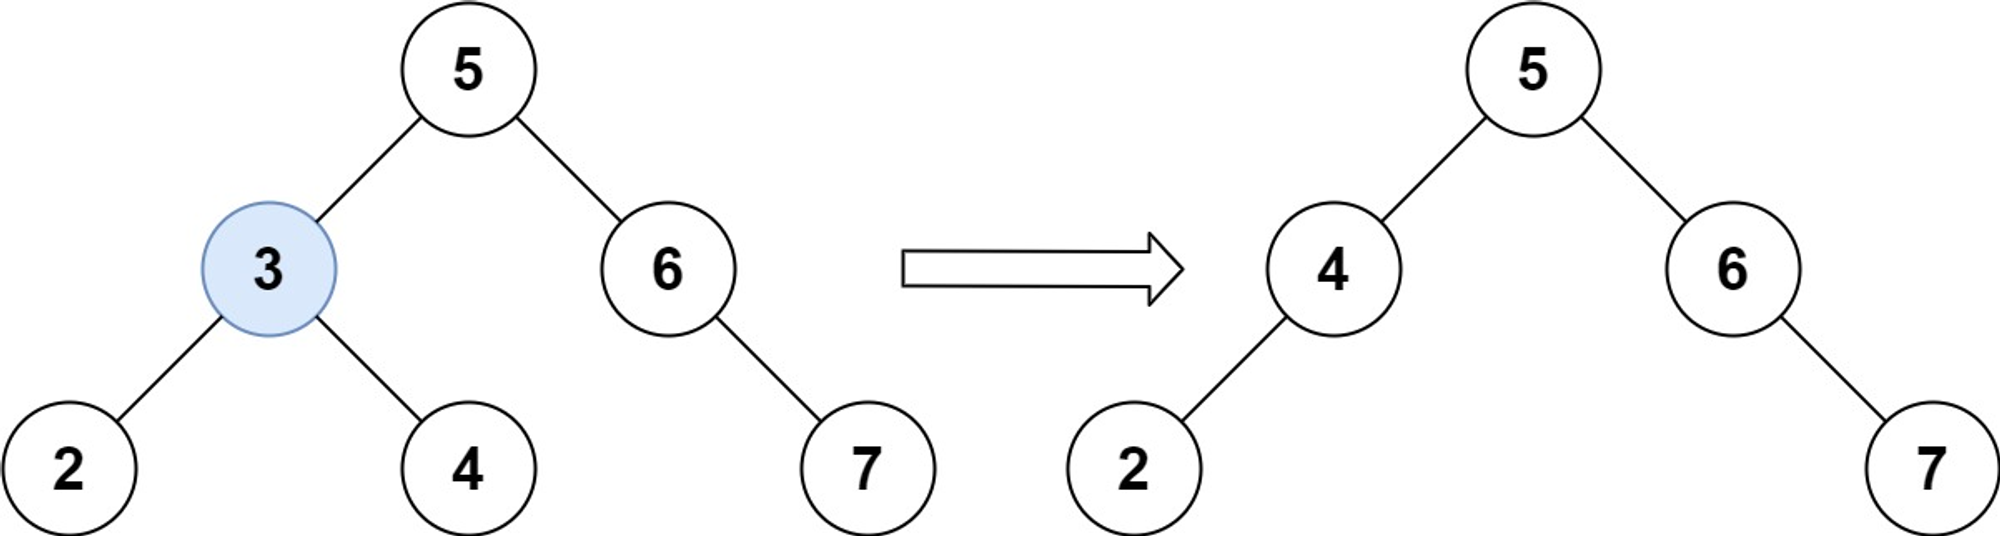

Output:

[5,4,6,2,null,null,7]
Explanation: Given key to delete is 3. So we find the node with value 3 and delete it.
One valid answer is [5,4,6,2,null,null,7], shown in the above BST.
Please notice that another valid answer is [5,2,6,null,4,null,7] and it's also accepted.

**Example 2:**

Input:
```
root = [5,3,6,2,4,null,7], key = 0
````

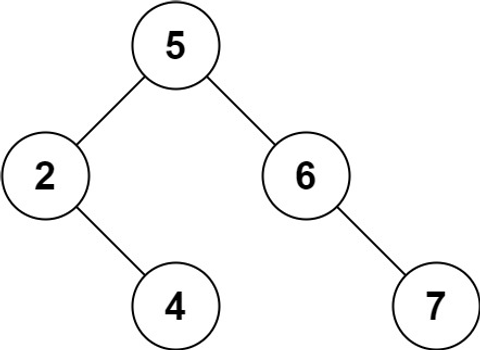

Output:

[5,3,6,2,4,null,7]

Explanation: The tree does not contain a node with value = 0.

**Code :**

In [ ]:
class Solution:
    def deleteNode(self, root: TreeNode, key: int) -> TreeNode:
        if root is None:
            return None
        if key < root.val:
            root.left = self.deleteNode(root.left, key)
        elif key > root.val:
            root.right = self.deleteNode(root.right, key)
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            root.val = self.minVal(root.right)
            root.right = self.deleteNode(root.right, root.val)
        return root

    def minVal(self, root):
        min_val = root.val
        while root.left is not None:
            min_val = root.left.val
            root = root.left
        return min_val

**Q4. Given a binary search tree (BST), find the lowest common ancestor (LCA) node of two given nodes in the BST.**

The lowest common ancestor is defined between two nodes `p` and `q` as the lowest node in `T` that has both `p` and `q` as descendants (where we allow **a node to be a descendant of itself**).

**Example 1:**

Input: 

root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 8

![img](https://assets.leetcode.com/uploads/2018/12/14/binarysearchtree_improved.png)

Output: 6
Explanation: The LCA of nodes 2 and 8 is 6.

**Example 2:**

Input: 

root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 4
Output: 2
Explanation: The LCA of nodes 2 and 4 is 2, since a node can be a descendant of itself according to the LCA definition.

![image](https://assets.leetcode.com/uploads/2018/12/14/binarysearchtree_improved.png)

Code:

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: TreeNode, p: TreeNode, q: TreeNode) -> TreeNode:
        if root is None or root == p or root == q:
            return root

        left = self.lowestCommonAncestor(root.left, p , q)
        right = self.lowestCommonAncestor(root.right, p ,q)

        if left is None:
            return right
        if right is None:
            return left
        else:
            return root